<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Подготовка-окружения" data-toc-modified-id="Подготовка-окружения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка окружения</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Предварительная-обработка" data-toc-modified-id="Предварительная-обработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительная обработка</a></span></li></ul></div>

ФИО: Макейкин Олег Алексеевич

https://github.com/OlMac48

MakeykinOleg@yandex.ru

olegmakeykin@gmail.com

<h1>Startups operations/close predictions [M1_40DS+] Makeykin Oleg<span class="tocSkip"></span></h1>
Разработка модели машинного обучения для предсказания судьбы стартапов

<h1>Описание проекта<span class="tocSkip"></span></h1>

**Цель проекта:** 
1. Разработать модель машинного обучения для предсказания продолжения деятельности стартапа. 
2. Провести полноценный разведочный анализ и сформировать рекомендации будущим создателям стартапов (какие факторы влияют на успешность стартапа).

Для анализа предоставлены данные по стартапам за период с 1970 по 2018 годы. Необходимо предсказать какие стартапы закроются.
Данные уже разделены на две выборки: тренировочную и тестовую. Целевым признаком в тренировочной выборке является status - он может принимать значения operating или closed.
Исходные данные:
Датасет состоит из двух файлов (+пример с выгрузкой): тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

kaggle_startups_train.csv - информация (53 000) стартапах, которые будут использоваться в качестве обучающих данных.

kaggle_startups_test.csv - информация (13 000) стартапах, которые будут использоваться в качестве тестовых данных. 
Целевым признаком является значение 'status' для каждого стартапа из этого датасета.

kaggle_startups_sample_submit.csv - файл с примером предсказаний в правильном формате.
name - идентификатор (название) стартапа в тестовом наборе.
status - целевой признак. Для каждого стартапа предскажите категориальное значение соответствующее прогнозу ['operating', 'closed'].


В качестве метрики необходимо использовать f1-score.

**Описание полей данных**

 - `name` - Название стартапа
 - `category_list` - Список категорий, к которым относится стартап
 - `funding_total_usd` - Общая сумма финансирования в USD
 - `status` - Статус стартапа (закрыт или действующий)
 - `country_code` - Код страны
 - `state_code` - Код штата
 - `region` - Регион
 - `city` - Город
 - `funding_round` - Количество раундов финансирования
 - `founded_at` - Дата основания
 - `first_funding_at` - Дата первого раунда финансирования
 - `last_funding_at` - Дата последнего раунда финансирования
 - `closed_at` - Дата закрытия стартапа (если применимо)
 - `lifetime` - Время существования стартапа в днях
 
**План работы**

1. Загрузка и ознакомление с данными;
2. Предварительная обработка;
3. Полноценный разведочный анализ;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков;
10. Подготовка отчета по исследованию.

 
 pandas - для работы с данными и математических операций.
matplotlib и seaborn - для визуализации данных.
scikit-learn - для предобработки данных, разделения на тренировочные и тестовые наборы, построения и оценки моделей машинного обучения.
catboost или lightgbm - для работы с продвинутыми моделями градиентного бустинга.
shap - для анализа важности признаков модели
phik - для оценки признаков на мультиколлинеарность

## Загрузка и ознакомление с данными

### Подготовка окружения

In [4]:
# установим, обновим библиотеки
!pip install missingno -q
!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn -q

In [5]:
#загрузка библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as st
import phik
import shap
import missingno as msno
#import sweetviz as sv

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [6]:
# загружаем модели машинного обучения

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [7]:
# загружаем метрики

from sklearn.metrics import f1_score

# загружаем классы для работы с данными

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                    RandomizedSearchCV)
from sklearn.preprocessing import (OneHotEncoder, 
                                   LabelEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler,
                                   RobustScaler)

In [8]:
# задаем константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка данных

In [60]:
#для вывода информации о наборах данных создадим функцию - первые стоки датасета, основная информация, диаграмма пропусков
def firstdf(data_s, name_s, numb):
    if numb == 1:
        display(f"Таблица {name_s}:", data_s.head())
        display(f'Информация о таблице {name_s}: ')
        display(data_s.info())
        display(f'Дубликатов в таблице {name_s} ', data_s.duplicated().sum())
    elif numb == 2:   
        display(f'Таблица {name_s}:', data_s.head())
        display(f'Информация о таблице {name_s}: ')
        display(data_s.info())
        display(f'Дубликатов в таблице  {name_s} ', data_s.duplicated().sum())

        fig, ax = plt.gcf(), plt.gca()
        msno.bar(data_s, color="dodgerblue", sort="ascending", fontsize=10, figsize=(5,3));
        
        ax.tick_params(labelsize=10)
        ax.set_xlabel("колонки", fontsize=12)
        ax.set_title(f'Диаграмма пропусков в таблице \n {name_s}:', fontsize=12)
        ax.set_ylabel("процент и абсолютное количество\n заполненных значений ", fontsize=10)

        plt.show()
    elif numb == 3:   
        display(f'Перечень колонок таблицы \n{name_s}: ')
        for col in data_s.columns:
            print(col)
    elif numb == 4:   
        data_s.columns = data_s.columns.str.lower()
        display(data_s.info())
    elif numb == 5:
        fig, ax = plt.gcf(), plt.gca()
        msno.bar(data_s, color="dodgerblue", fontsize=10, figsize=(10,5));
        
        ax.tick_params(labelsize=10)
        ax.set_xlabel("колонки", fontsize=10)
        ax.set_title(f'Диаграмма пропусков в таблице \n {name_s}:', fontsize=12)
        ax.set_ylabel("процент и абсолютное количество\n заполненных значений ", fontsize=10)
       
    else :
        display('Неверный параметр', numb)        

'Таблица Информация о стартапах, обучающие данные:'

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT


'Информация о таблице Информация о стартапах, обучающие данные: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

None

'Дубликатов в таблице  Информация о стартапах, обучающие данные '

0

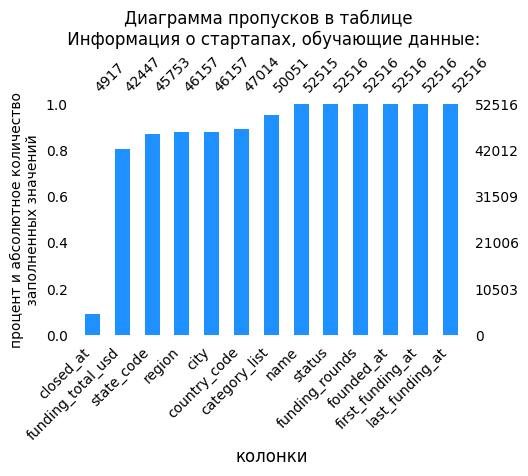

In [44]:
# загрузка тренировочных данных, с обработкой дат 

try:
    df_train = pd.read_csv(
        "C:\\Users\Makeikin-o\\master-Olmakey\\kaggle_startups_train_28062024.csv", 
        parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at'])
except:
    df_train = pd.read_csv(
        'https://github.com/OlMac48/master-Olmakey/blob/master/kaggle_startups_train_28062024.csv', 
        parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at'])

firstdf(df_train, 'Информация о стартапах, обучающие данные', 2)

В ряде колонок наблюдаются пропуски, например код штата, страна, регион, город - до 10% пропущенных значений. В колонке список категорий к которым относится стартап также наблюдается значительное количество пропусков.

'Таблица Информация о стартапах, тестовые данные:'

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


'Информация о таблице Информация о стартапах, тестовые данные: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


None

'Дубликатов в таблице  Информация о стартапах, тестовые данные '

0

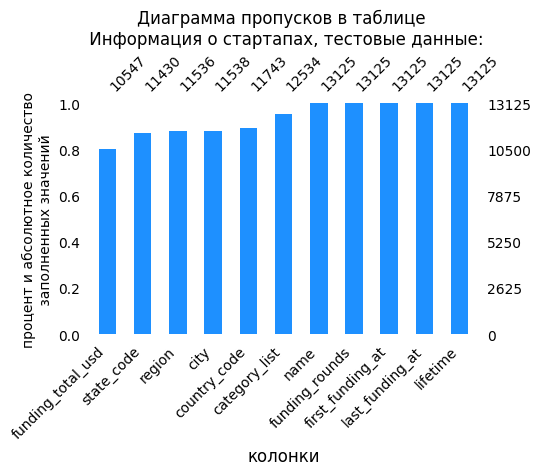

In [45]:
try:
    df_test = pd.read_csv(
        'C:\\Users\\Makeikin-o\\master-Olmakey\\kaggle_startups_test_28062024.csv', 
        parse_dates=['first_funding_at', 'last_funding_at'])
except:
    df_test = pd.read_csv(
        'https://github.com/OlMac48/master-Olmakey/blob/master/kaggle_startups_test_28062024.csv', 
        parse_dates=['first_funding_at', 'last_funding_at'])

firstdf(df_test, 'Информация о стартапах, тестовые данные', 2)


В тестовых данных нет колонок - founded_at, closed_at, status- информации о времени открытия стартапа, времени закрытия стартапа, и статусе стартапа. В обучающих данных нет колонки - lifetime - время жизни стартапа.

**Итог:** Обучающие и тестовые данные загружены. Даты преобразованы в единый формат.

## Предварительная обработка

Выявлено значительное количество пропусков, оценим существуют ли зависимости между ними.

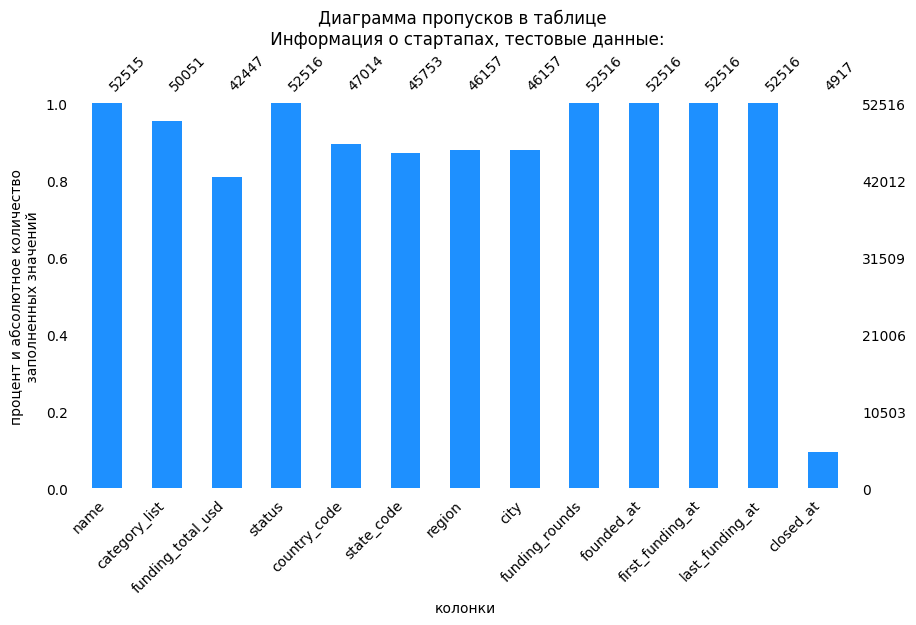

In [49]:
firstdf(df_train, 'Информация о стартапах, тестовые данные', 5)

<AxesSubplot:>

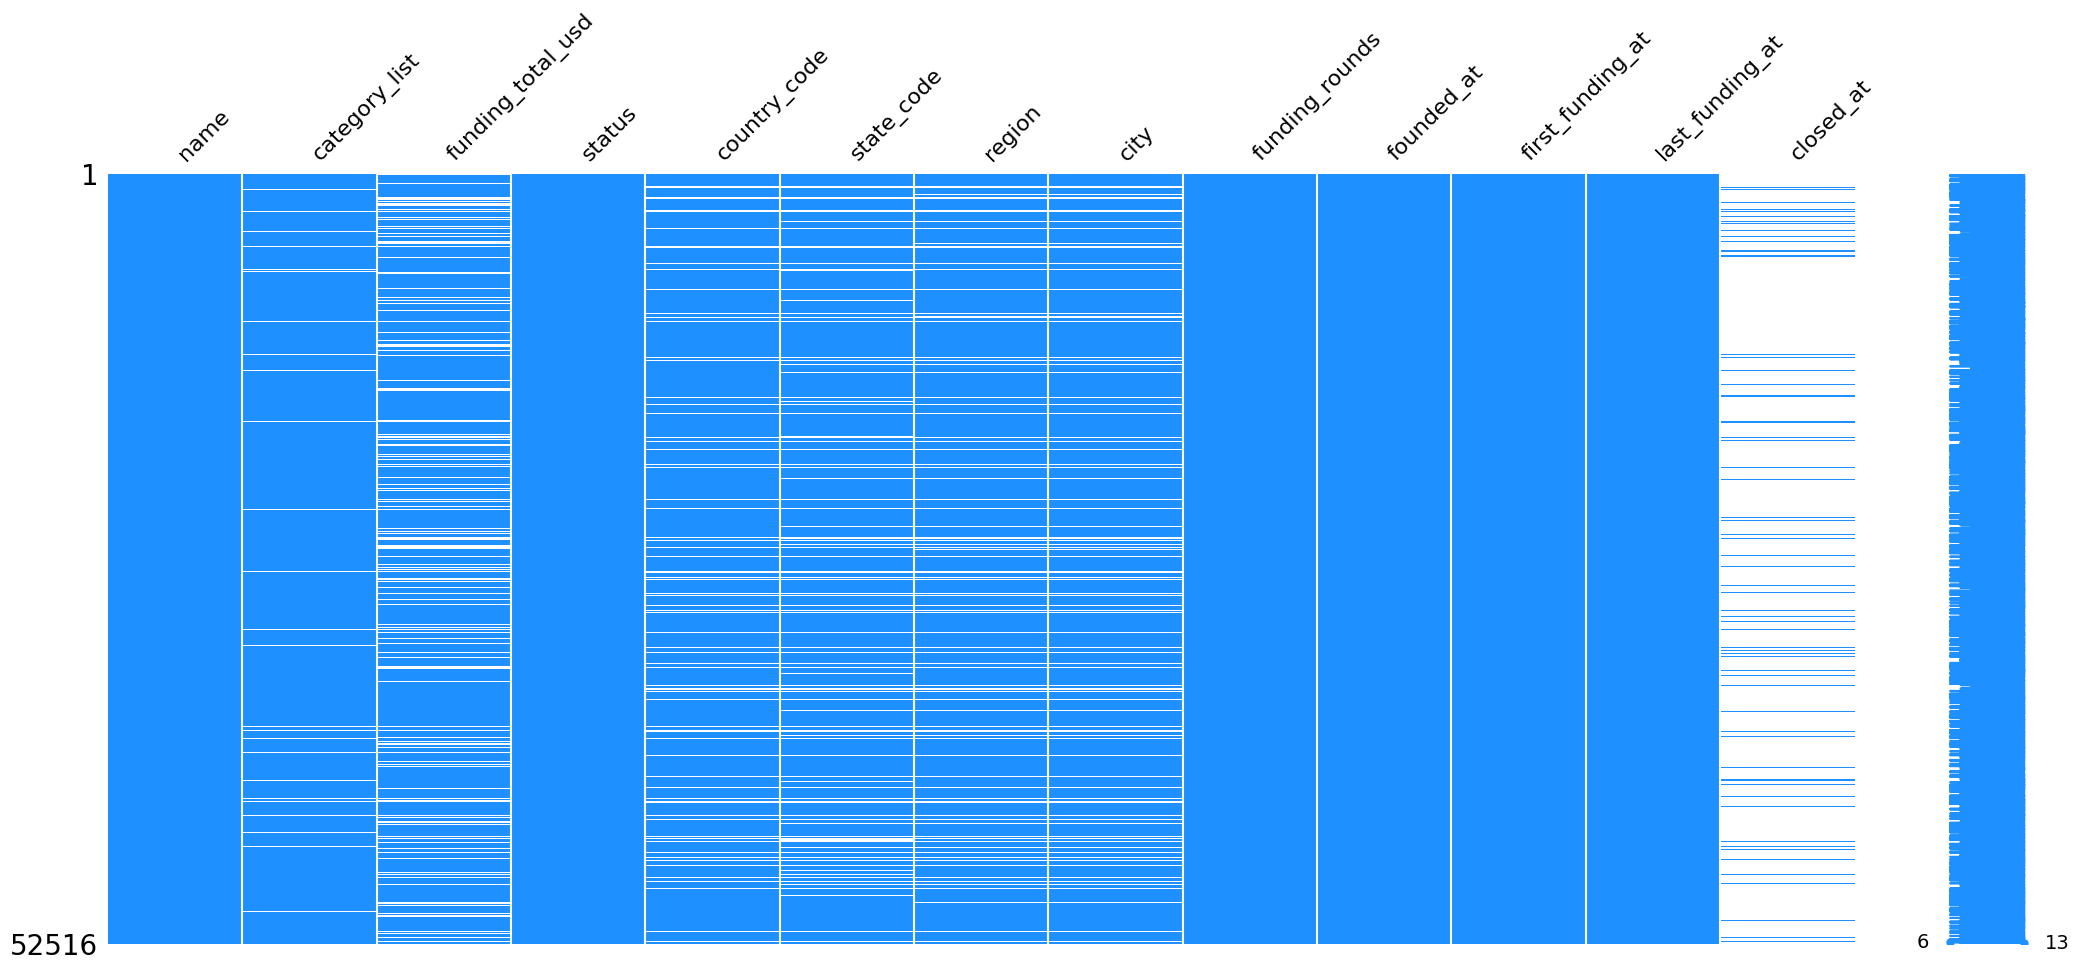

In [72]:

msno.matrix(df_train, color = (0.11765, 0.56471, 1.0))

<AxesSubplot:>

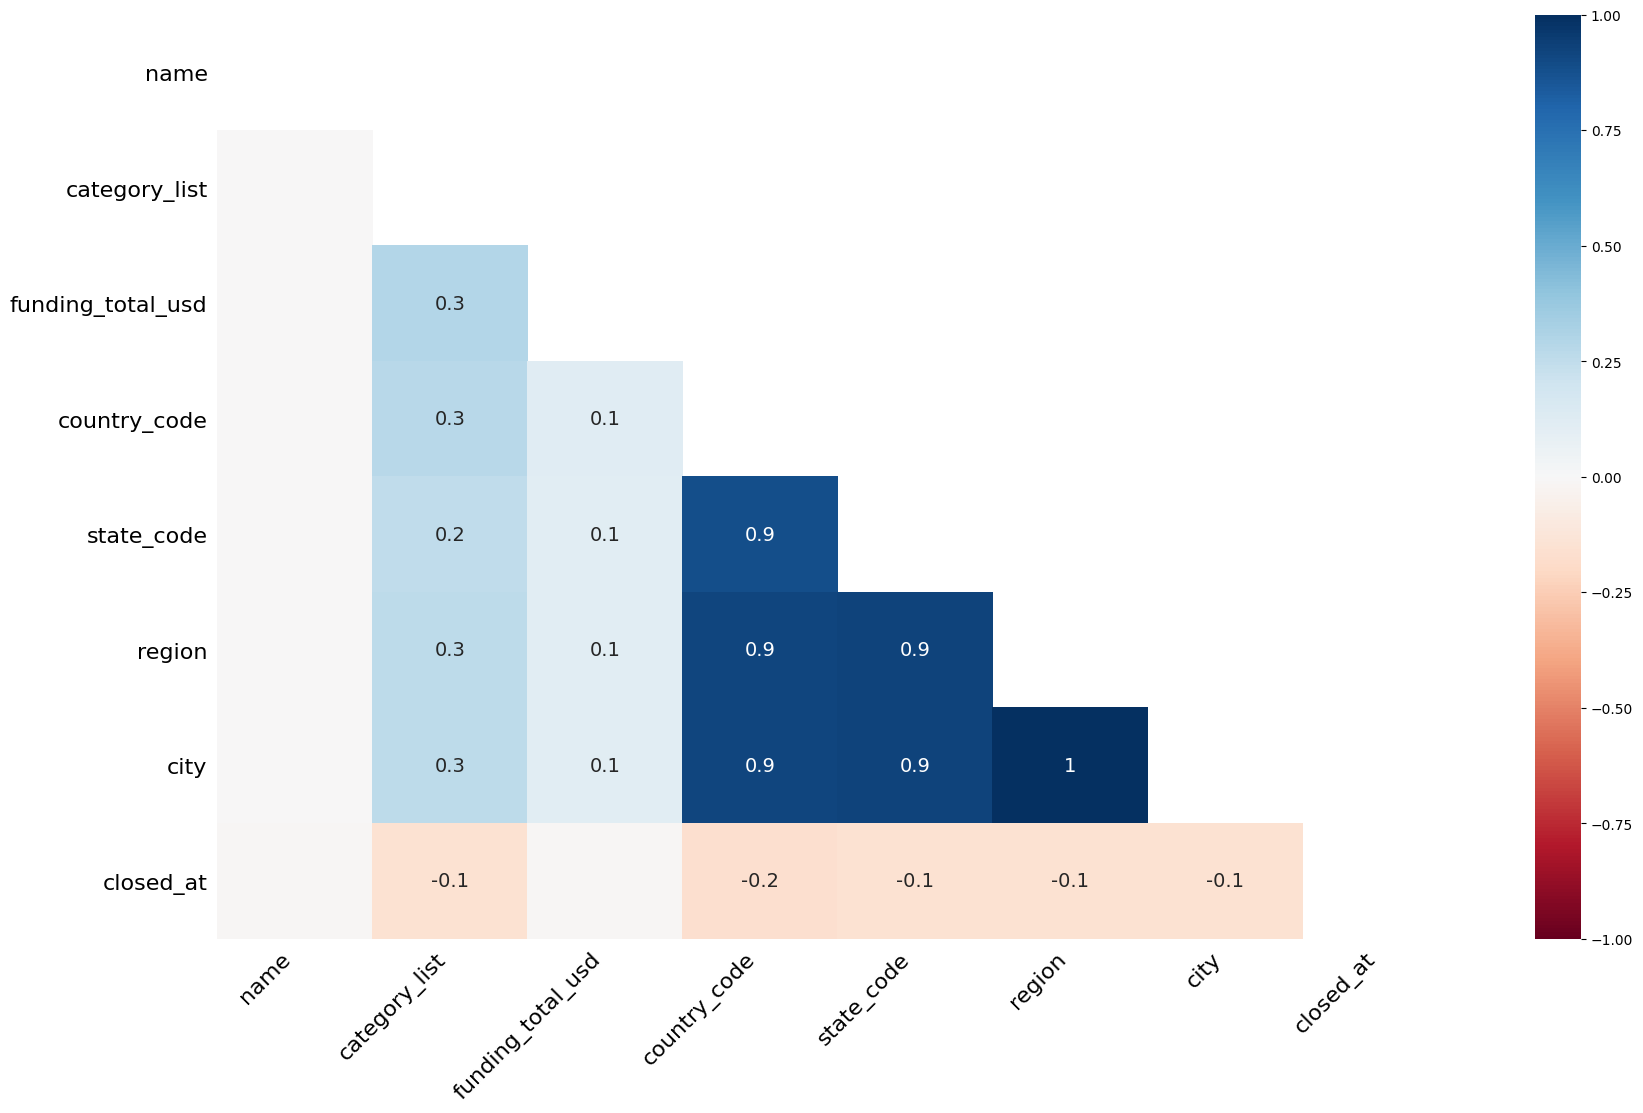

In [31]:
#зависят ли пропуски от значений других столбцов?
msno.heatmap(df_train)

Обнаружена зависимость пропусков в столбцах city, region, country_code, state_code. В колонке closed_at отсутствующие поля заменим на "unkn" - стартапы еще не закончились.